<a href="https://colab.research.google.com/github/MayraShaday/TSP_Algoritmo-gen-tico/blob/main/Ejemplo_TSP_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygad

Mejor solución (ruta): [6 1 4 0 5 3 8 2 7 9]
Distancia total: 290.31 unidades


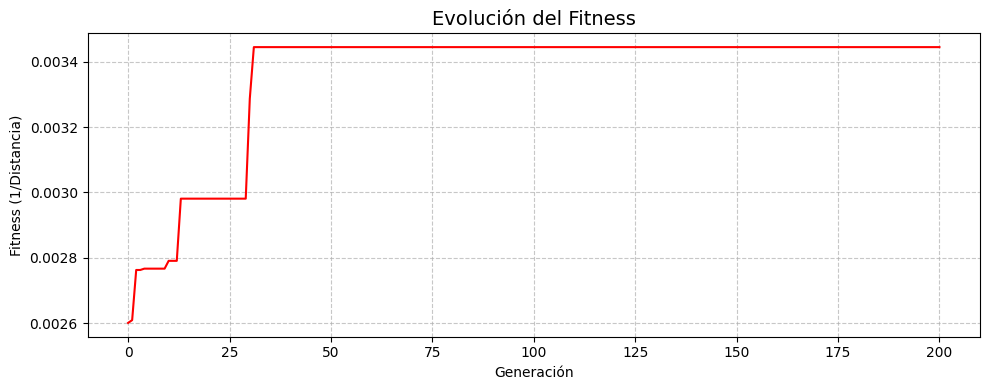

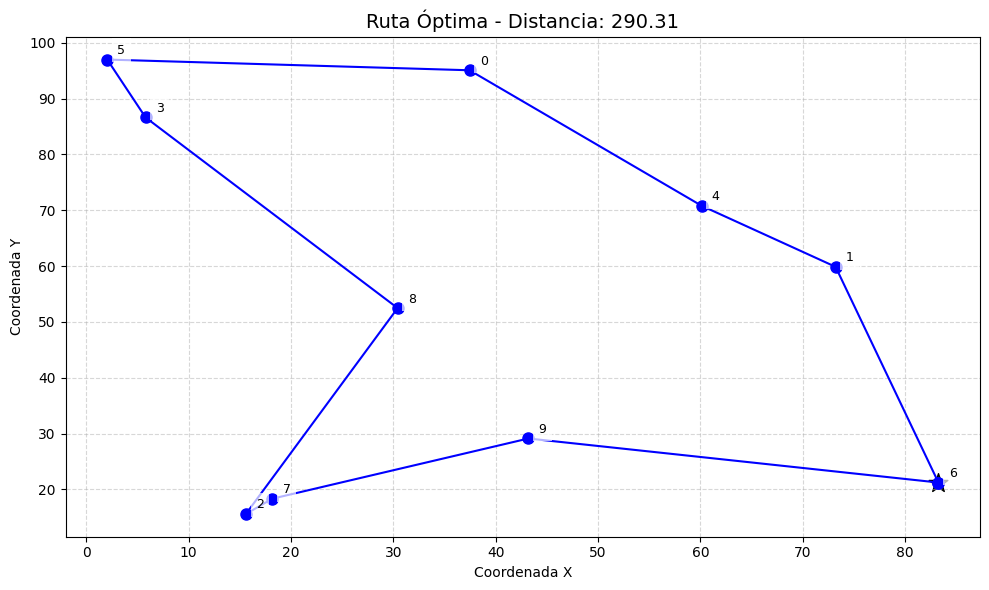

In [ ]:
import numpy as np
import pygad
import matplotlib.pyplot as plt

# ------------------------------
# 1. GENERAMOS LAS CIUDADES
# ------------------------------
np.random.seed(42)
num_ciudades = 10
ciudades = np.random.rand(num_ciudades, 2) * 100

# Precalcular matriz de distancias
distancias = np.zeros((num_ciudades, num_ciudades))
for i in range(num_ciudades):
    for j in range(i + 1, num_ciudades):
        dist = np.linalg.norm(ciudades[i] - ciudades[j])
        distancias[i, j] = dist
        distancias[j, i] = dist

# ------------------------------
# 2. FUNCIÓN DE DISTANCIA
# ------------------------------
def calcular_distancia(ruta):
    ruta = ruta.astype(int)
    dist_consecutivas = distancias[ruta[:-1], ruta[1:]]
    dist_retorno = distancias[ruta[-1], ruta[0]]
    return np.sum(dist_consecutivas) + dist_retorno

# ------------------------------
# 3. FUNCIÓN DE FITNESS
# ------------------------------
def fitness_func(ga_instance, solution, solution_idx):
    ruta_valida = np.argsort(solution)
    distancia = calcular_distancia(ruta_valida)
    return 1.0 / (distancia + 1e-6)

# ------------------------------
# 4. CONFIGURACIÓN DE PYGAD
# ------------------------------
ga = pygad.GA(
    num_generations=200,
    num_parents_mating=15,
    fitness_func=fitness_func,
    sol_per_pop=50,
    num_genes=num_ciudades,
    gene_type=float,
    parent_selection_type="tournament",
    keep_parents=5,
    crossover_type="two_points",
    mutation_type="swap",
    mutation_percent_genes=15,
    allow_duplicate_genes=True,
    suppress_warnings=True,
    random_mutation_min_val=0.0,
    random_mutation_max_val=1.0
)

# ------------------------------
# 5. EJECUCIÓN Y RESULTADOS
# ------------------------------
ga.run()
solucion_raw, fitness, _ = ga.best_solution()
ruta_final = np.argsort(solucion_raw).astype(int)
distancia_final = calcular_distancia(ruta_final)

print("="*50)
print(f"Mejor solución (ruta): {ruta_final}")
print(f"Distancia total: {distancia_final:.2f} unidades")
print("="*50)

# ------------------------------
# 6. VISUALIZACIÓN
# ------------------------------
def graficar_ruta(ruta):
    ruta_cerrada = np.append(ruta, ruta[0])
    puntos = ciudades[ruta_cerrada]

    plt.figure(figsize=(10, 6))
    plt.plot(puntos[:,0], puntos[:,1], 'bo-', linewidth=1.5, markersize=8)
    plt.scatter(puntos[0,0], puntos[0,1], c='green', s=200, marker='*', edgecolor='black')

    for i, punto in enumerate(ciudades):
        plt.text(punto[0] + 1, punto[1] + 1, f'{i}', fontsize=9,
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    plt.title(f"Ruta Óptima - Distancia: {distancia_final:.2f}", fontsize=14)
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Gráfica de evolución del fitness
plt.figure(figsize=(10, 4))
plt.plot(ga.best_solutions_fitness, 'r-', linewidth=1.5)
plt.title("Evolución del Fitness", fontsize=14)
plt.xlabel("Generación")
plt.ylabel("Fitness (1/Distancia)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

graficar_ruta(ruta_final)